In [1]:
# import tweepy
# import csv
# import pandas as pd
# ####input your credentials here
# consumer_key = ''
# consumer_secret = ''
# access_token = ''
# access_token_secret = ''

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_token_secret)
# api = tweepy.API(auth,wait_on_rate_limit=True)

# # Open/Create a file to append data
# csvFile = open('test.csv', 'a')
# #Use csv Writer
# csvWriter = csv.writer(csvFile)

# for tweet in tweepy.Cursor(api.search,q="#CANDLE4SSR",count=100,
#                            lang="en",
#                            since="2020-06-22").items():
#     print (tweet.created_at, tweet.text)
#     csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])

## Method 2

In [2]:
pip install twitterscraper

     |████████████████████████████████| 92kB 4.0MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.6.1-cp36-none-any.whl size=11349 sha256=2d40db8c9034cb64f52b5dffffc5394fcfbe2ecf8928d16cc4c87b4052066ff9
  Stored in directory: /root/.cache/pip/wheels/1a/50/a0/808fd6df0ac14c168b73874056a1ca52e4d88c0c1ecedd4e48
Successfully built twitterscraper


In [3]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 2.9MB/s 


In [4]:
pip install langdetect

     |████████████████████████████████| 983kB 2.9MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=6683b156901df8347765ce9cd0c8c2d43b05db7c13ab723fac9dfa4dc4ccfeed
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [5]:
import pandas as pd
import datetime as dt
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
def detector(x):
  try:
    return detect(x)
  except:
    None  

In [7]:
#Build Analyzer Object
analyzer = SentimentIntensityAnalyzer()

In [8]:
#Date
begin_date = dt.date(2020, 7, 21)
end_date = dt.date(2020, 7, 24)

In [9]:
#query tweets  - With Twitterscraper there are limits on the no. of tweets that are pulled in. Here I could pull only 10236 tweets.
tweets = query_tweets("Candle4SSR", begindate=begin_date, enddate=end_date, limit =3000000) 

Failed to parse JSON while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgK3pj77t2CMWgICo6bKtjdkjEjUAFQAlAFUAFQAVARUAFQAA&q=Candle4SSR%20since%3A2020-07-22%20until%3A2020-07-23&l="
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/twitterscraper/query.py", line 107, in query_single_page
    html = json_resp['items_html'] or ''
KeyError: 'items_html'
Failed to parse JSON while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgK3pj77t2CMWgICo6bKtjdkjEjUAFQAlAFUAFQAVARUAFQAA&q=Candle4SSR%20since%3A2020-07-22%20until%3A2020-07-23&l="
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/twitterscraper/query.py", line 107, in query_single_page
    html = json_resp

In [10]:
df = pd.DataFrame(t.__dict__ for t in tweets)

In [11]:

df1 = df[['text']]
export_csv = df1.to_csv (r'C:\Users\jagri\Downloads\Projects\NLP\tweets.csv', index = None, header=True)

In [13]:
df[['tweet_id', 'text']].head()

,tweet_id,text
0,1286451015277883393,#justiceforsushantforum\n#sushantdeathmystry\n...
1,1286450860084482048,#Candle4SSR
2,1286450471880683520,We the people of India support Republic bharat...
3,1286450072646037504,All those in bollywood who tried getting atten...
4,1286449278513229824,#Candle4SSR\n#SSRDidntCommitSuicide\n#WorldSee...


In [14]:
df.shape

(10236, 21)

In [15]:
#Filter for English Language
df['lang'] = df['text'].apply(lambda x:detector(x))
df = df[df['lang'] == 'en']
df[['tweet_id', 'text']].head()

,tweet_id,text
0,1286451015277883393,#justiceforsushantforum\n#sushantdeathmystry\n...
1,1286450860084482048,#Candle4SSR
2,1286450471880683520,We the people of India support Republic bharat...
3,1286450072646037504,All those in bollywood who tried getting atten...
4,1286449278513229824,#Candle4SSR\n#SSRDidntCommitSuicide\n#WorldSee...


#Sentiment Analysis

In [16]:
sentiment = df['text'].apply(lambda x: analyzer.polarity_scores(x))

In [17]:
df_sentiment = df['text'].apply(lambda x: analyzer.polarity_scores)

In [18]:
df_sentiment.head()

0    <bound method SentimentIntensityAnalyzer.polar...
1    <bound method SentimentIntensityAnalyzer.polar...
2    <bound method SentimentIntensityAnalyzer.polar...
3    <bound method SentimentIntensityAnalyzer.polar...
4    <bound method SentimentIntensityAnalyzer.polar...
Name: text, dtype: object

In [19]:
df =pd.concat([df, sentiment.apply(pd.Series)], 1)

In [20]:
df.describe()

,timestamp_epochs,likes,retweets,replies,neg,neu,pos,compound
count,9.636000e+03,9636.000000,9636.000000,9636.000000,9636.000000,9636.000000,9636.000000,9636.000000
mean,1.595422e+09,9.837277,6.373910,0.611561,0.037587,0.842748,0.119672,0.175229
std,4.665327e+04,250.657892,106.702249,30.643100,0.084903,0.188238,0.167359,0.406885
min,1.595336e+09,0.000000,0.000000,0.000000,0.000000,0.072000,0.000000,-0.998200
25%,1.595361e+09,0.000000,0.000000,0.000000,0.000000,0.707000,0.000000,0.000000
50%,1.595447e+09,1.000000,1.000000,0.000000,0.000000,0.936000,0.000000,0.000000
75%,1.595451e+09,2.000000,2.000000,0.000000,0.000000,1.000000,0.220000,0.526700
max,1.595549e+09,20014.000000,8902.000000,2971.000000,0.878000,1.000000,0.928000,0.997500


In [21]:
df.sort_values(by='timestamp', inplace=True)
df.index = pd.to_datetime(df['timestamp'])
df['mean'] = df['compound'].expanding().mean()
df['rolling'] = df['compound'].rolling('6h').mean()

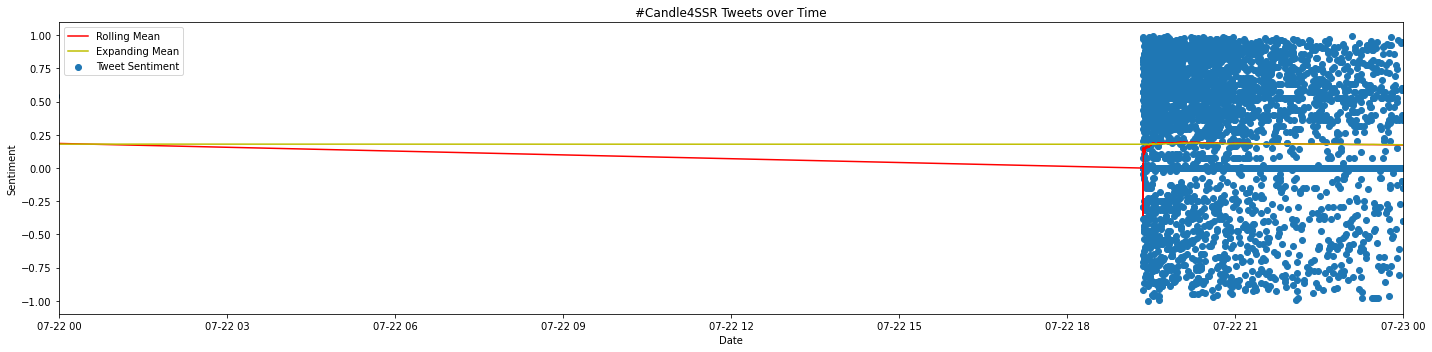

In [22]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.scatter(df['timestamp'],df['compound'], label='Tweet Sentiment')
ax.plot(df['timestamp'],df['rolling'], color ='r', label='Rolling Mean')
ax.plot(df['timestamp'],df['mean'], color='y', label='Expanding Mean')
ax.set_xlim([dt.date(2020,7,22),dt.date(2020,7,23)])
ax.set(title='#Candle4SSR Tweets over Time', xlabel='Date', ylabel='Sentiment')
ax.legend(loc='best')
fig.tight_layout()
plt.show()

In [23]:
#Reference: https://towardsdatascience.com/sentiment-analysis-of-anthem-game-launch-in-python-16be9e5083d2
# https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

## WordCloud

In [24]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline


In [25]:
import nltk
import re
from nltk.corpus import stopwords

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [26]:
messages = df['text'].copy()
messages[1]

'#Candle4SSR at 8PM with the photo of SSR'

In [27]:
#Fetch wordcount for each abstract
df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))
df[['text','word_count']].head()

,text,word_count
timestamp,,
2020-07-21 13:00:52,#candle4ssr,1
2020-07-21 13:00:57,#Candle4SSR at 8PM with the photo of SSR,8
2020-07-21 13:01:06,#candle4ssr,1
2020-07-21 13:01:07,@ishkarnBHANDARI\n#candle4SSR\nhttps://youtu.b...,1
2020-07-21 13:01:15,#candle4ssr\nI want justice for this guy,6


In [28]:
##Descriptive statistics of word counts
df.word_count.describe()

count    9636.000000
mean       12.908780
std        13.644279
min         1.000000
25%         2.000000
50%         7.000000
75%        20.000000
max        93.000000
Name: word_count, dtype: float64

In [29]:
#Identify common words
freq = pd.Series(' '.join(df['text']).split()).value_counts()[:20]
freq

#Candle4SSR         11114
…                    2922
for                  2417
the                  1921
to                   1867
and                  1542
a                    1401
you                  1377
of                   1326
is                   1187
@ishkarnBHANDARI     1106
will                 1083
We                   1061
in                   1040
are                   940
we                    895
justice               777
this                  749
with                  727
Sushant               726
dtype: int64

In [30]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(df 
         ['text']).split()).value_counts()[-20:]
freq1

Apne                                                                          1
🎧                                                                             1
live...                                                                       1
actors!!!!                                                                    1
pic.twitter.com/kLQlDjMG1v                                                    1
can..                                                                         1
wingerss....                                                                  1
-candle                                                                       1
🌸🌸❤️❤️                                                                        1
ago,                                                                          1
प्रदान                                                                        1
(few                                                                          1
https://twitter.com/HarjitK87607412/stat

In [31]:
# Libraries for text preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [32]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [33]:
corpus = []
for i in range(0, 3847):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()    
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [34]:
#View corpus item
corpus[222]

'online candle march shusantsinghrajput time pm date nd july tomorrow tag candle ssr reason justice ssr focus peaceful demand justice requested ishkarnbhandari retweet much justice sushanttruthnowpic twitter com jqgkfgnixh'

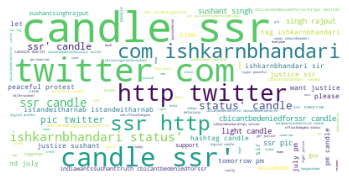

In [35]:

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
                         
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

Reference: https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [37]:
list(cv.vocabulary_.keys())[:10]

['pm',
 'photo',
 'ssr pm',
 'candle ssr pm',
 'ishkarnbhandari',
 'http',
 'youtu',
 'ulb',
 'zlcvc',
 'ishkarnbhandari candle']

[Text(0, 0, 'candle'),
 Text(0, 0, 'ssr'),
 Text(0, 0, 'twitter'),
 Text(0, 0, 'com'),
 Text(0, 0, 'ishkarnbhandari'),
 Text(0, 0, 'status'),
 Text(0, 0, 'http'),
 Text(0, 0, 'justice'),
 Text(0, 0, 'pm'),
 Text(0, 0, 'sushant'),
 Text(0, 0, 'cbicantbedeniedforssr'),
 Text(0, 0, 'pic'),
 Text(0, 0, 'tomorrow'),
 Text(0, 0, 'sir'),
 Text(0, 0, 'light'),
 Text(0, 0, 'indiawantssushanttruth'),
 Text(0, 0, 'july'),
 Text(0, 0, 'protest'),
 Text(0, 0, 'want'),
 Text(0, 0, 'let')]

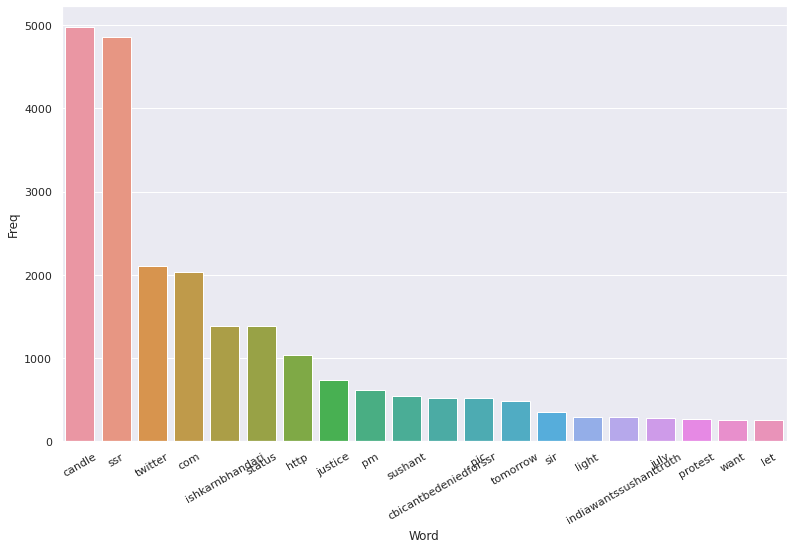

In [38]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                         Bi-gram  Freq
0                     candle ssr  4472
1                    twitter com  2017
2                   http twitter   953
3                       ssr http   722
4            com ishkarnbhandari   718
5         ishkarnbhandari status   718
6                     ssr candle   634
7                    pic twitter   400
8                        ssr pic   261
9                   light candle   250
10  cbicantbedeniedforssr candle   223
11                 sushant singh   199
12                  singh rajput   193
13               justice sushant   165
14                  want justice   164
15                       july pm   157
16                   tomorrow pm   155
17                       nd july   143
18              peaceful protest   142
19                   justice ssr   123


[Text(0, 0, 'candle ssr'),
 Text(0, 0, 'twitter com'),
 Text(0, 0, 'http twitter'),
 Text(0, 0, 'ssr http'),
 Text(0, 0, 'com ishkarnbhandari'),
 Text(0, 0, 'ishkarnbhandari status'),
 Text(0, 0, 'ssr candle'),
 Text(0, 0, 'pic twitter'),
 Text(0, 0, 'ssr pic'),
 Text(0, 0, 'light candle'),
 Text(0, 0, 'cbicantbedeniedforssr candle'),
 Text(0, 0, 'sushant singh'),
 Text(0, 0, 'singh rajput'),
 Text(0, 0, 'justice sushant'),
 Text(0, 0, 'want justice'),
 Text(0, 0, 'july pm'),
 Text(0, 0, 'tomorrow pm'),
 Text(0, 0, 'nd july'),
 Text(0, 0, 'peaceful protest'),
 Text(0, 0, 'justice ssr')]

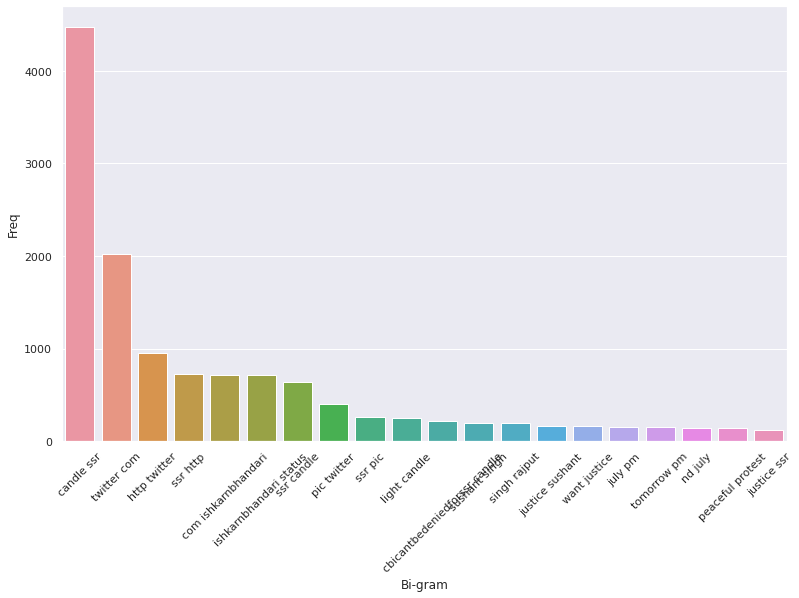

In [39]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                                             Tri-gram  Freq
0                                    http twitter com   952
1                         twitter com ishkarnbhandari   718
2                          com ishkarnbhandari status   718
3                                    ssr http twitter   706
4                                     candle ssr http   704
5                                      ssr candle ssr   614
6                                   candle ssr candle   569
7                                     pic twitter com   397
8                                     ssr pic twitter   260
9                                      candle ssr pic   256
10                   cbicantbedeniedforssr candle ssr   223
11                               sushant singh rajput   189
12                              justice sushant singh   112
13    istandwitharnab istandwitharnab istandwitharnab   108
14                                 hashtag candle ssr   100
15                                      

[Text(0, 0, 'http twitter com'),
 Text(0, 0, 'twitter com ishkarnbhandari'),
 Text(0, 0, 'com ishkarnbhandari status'),
 Text(0, 0, 'ssr http twitter'),
 Text(0, 0, 'candle ssr http'),
 Text(0, 0, 'ssr candle ssr'),
 Text(0, 0, 'candle ssr candle'),
 Text(0, 0, 'pic twitter com'),
 Text(0, 0, 'ssr pic twitter'),
 Text(0, 0, 'candle ssr pic'),
 Text(0, 0, 'cbicantbedeniedforssr candle ssr'),
 Text(0, 0, 'sushant singh rajput'),
 Text(0, 0, 'justice sushant singh'),
 Text(0, 0, 'istandwitharnab istandwitharnab istandwitharnab'),
 Text(0, 0, 'hashtag candle ssr'),
 Text(0, 0, 'pm candle ssr'),
 Text(0, 0, 'candle ssr ishkarnbhandari'),
 Text(0, 0, 'nd july pm'),
 Text(0, 0, 'indiawantssushanttruth cbicantbedeniedforssr candle'),
 Text(0, 0, 'ishkarnbhandari candle ssr')]

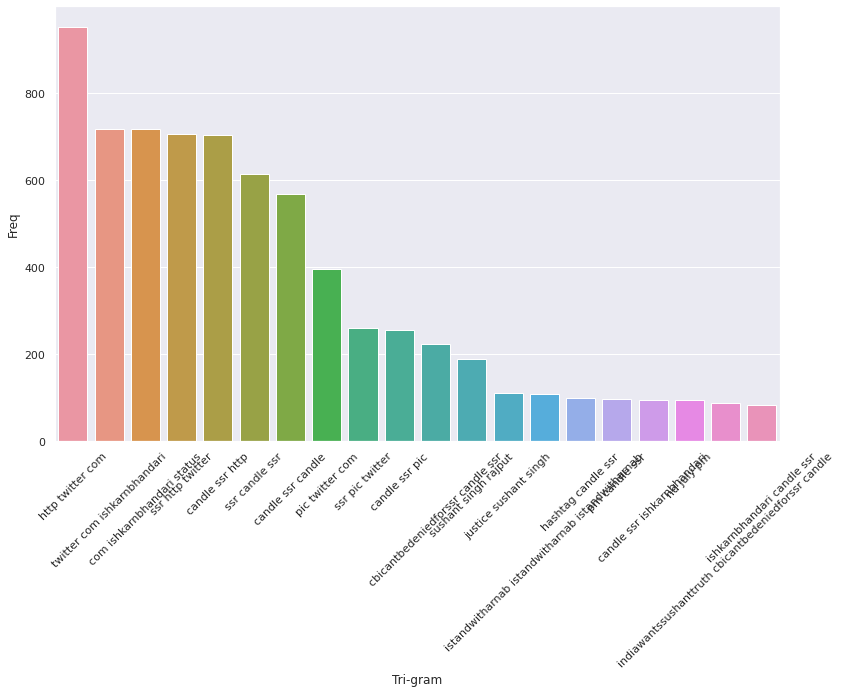

In [40]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[532]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [42]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])    


Abstract:
light candle upload photo hashtag candle ssr tomorrow please support justice

Keywords:
upload photo hashtag 0.264
tomorrow please 0.264
please support justice 0.264
light candle upload 0.264
candle upload photo 0.264
